# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier

# Loading Data

In [2]:
df=pd.read_csv('train.csv')
#df_exp=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
#test_df_exp=pd.read_csv('test.csv')

# Exploring Data

In [4]:
df.dtypes
#test_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.shape

(891, 12)

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(*args, **kw)>

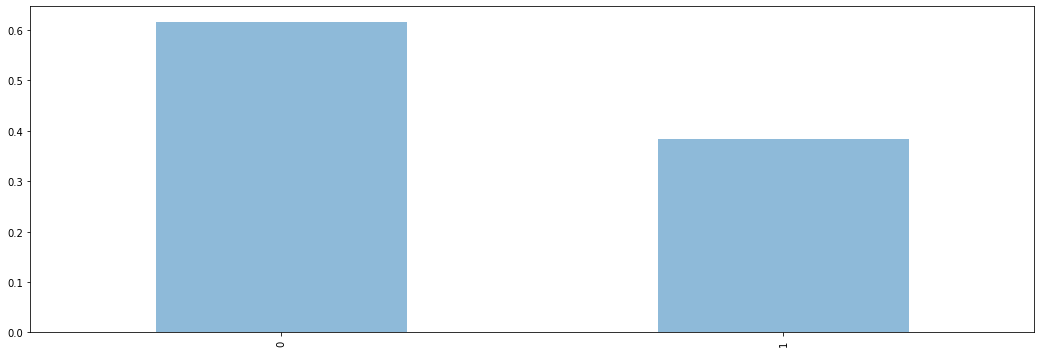

In [8]:
fig=plt.figure(figsize=(18,6))
df.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

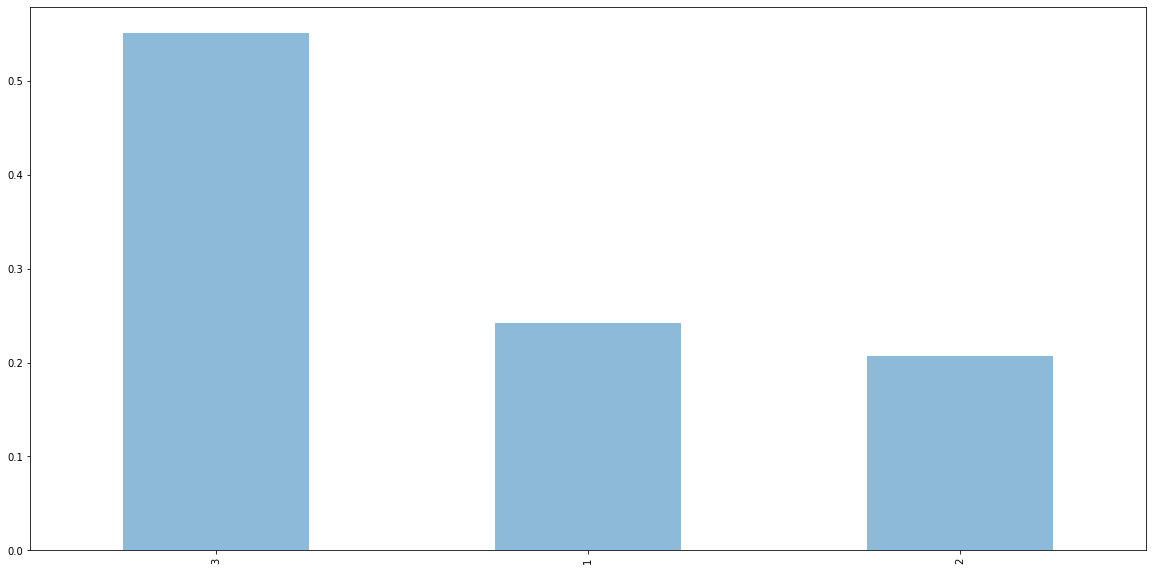

In [9]:
fig1=plt.figure(figsize=(20,10))
df.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show

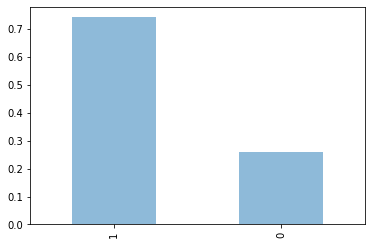

In [11]:
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

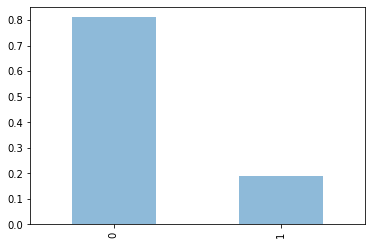

In [12]:
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

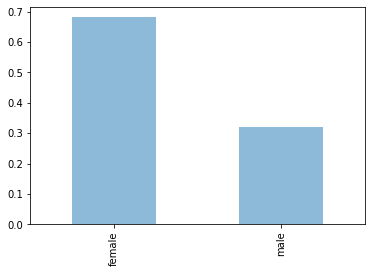

In [13]:


df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

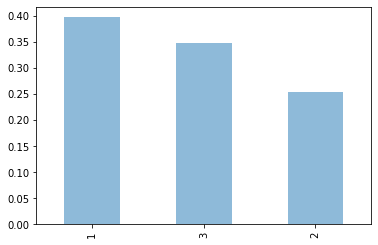

In [14]:
df.Pclass[df.Survived==1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

## Looking for Missing values

In [15]:
miss_values1=df.isnull()
miss_values1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
miss_values=df.isnull().sum()

In [17]:
miss_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
miss_values['Age'].sum()

177

In [19]:
177/891

0.19865319865319866

In [20]:
miss_values['Cabin'].sum()

687

In [21]:
687/891

0.7710437710437711

In [22]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

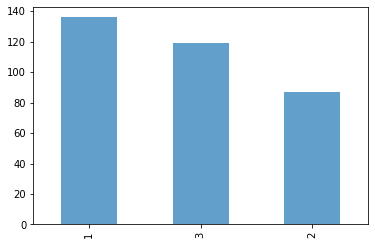

In [23]:
df.Pclass[df.Survived==1].value_counts().plot(kind='bar', alpha=0.7)
plt.show()

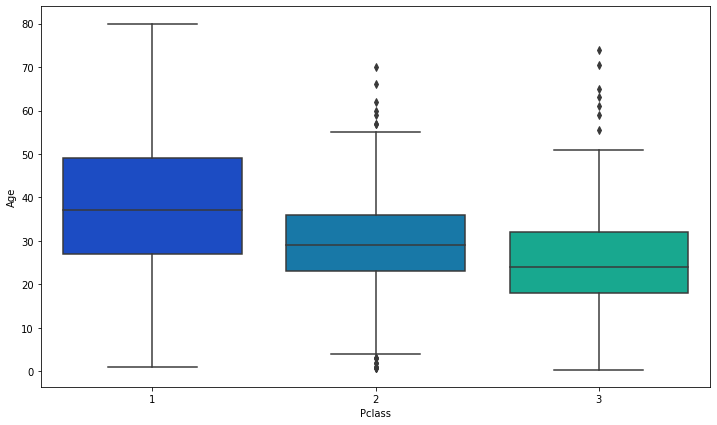

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# Cleaning the Data

## Dropping embarked column

In [25]:
df.dropna(subset=['Embarked'],axis=0,inplace=True)
#df_exp.dropna(subset=['Embarked'],axis=0,inplace=True)

In [26]:
df.describe()
#df_exp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
abc=df

In [28]:
abc.sum()

PassengerId                                               396494
Survived                                                     340
Pclass                                                      2055
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21105.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28533.9
Embarked       SCSSSQSSSCSSSSSSQSSCSSQSSSCSQSCCQSCSCSSCSSCCQS...
dtype: object

## Taking Care missing values in Aging Column

In [29]:
def age_change(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [30]:
df['Age'] = df[['Age','Pclass']].apply(age_change,axis=1)
#df_exp['Age'] = df_exp[['Age','Pclass']].apply(age_change,axis=1)

In [31]:
#df_exp.isnull().sum()

# Removing the cabin column

In [32]:
df.drop('Cabin', axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
#df_exp.drop('Cabin', axis=1,inplace=True)
#df_exp.head()

# Converting Catagorical features to numerical ones (One Hot Encoding)

In [34]:
sex=pd.get_dummies(df['Sex'])
#sex1=pd.get_dummies(df_exp['Sex'])

In [35]:
embarked=pd.get_dummies(df['Embarked'])
#embarked1=pd.get_dummies(df_exp['Embarked'])

## Dropping Columns

In [36]:
df.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)
#df_exp.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [37]:
df=pd.concat([df,sex,embarked],axis=1)
#df_exp=pd.concat([df_exp,sex1,embarked1],axis=1)

In [38]:
df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,6,0,3,24.0,0,0,8.4583,0,1,0,1,0
6,7,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,8,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,9,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,10,1,2,14.0,1,0,30.0708,1,0,1,0,0


In [39]:
#df_exp.head(10)

In [40]:
#df_exp.drop('female',axis=1,inplace=True)
#df_exp.head(10)

In [41]:
#df_exp.rename(columns = {"sex": "Sex"},inplace = True)
#df_exp.head(10)
#male=1

# Data wrangling for Test Data Set

In [42]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
#test_df_exp.isnull().sum()

In [44]:
test_df.dropna(subset=['Fare'], axis=0, inplace= True)
#test_df_exp.dropna(subset=['Fare'], axis=0, inplace= True)

In [45]:
def replace(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age
        
    

In [46]:
test_df['Age']=test_df[['Age','Pclass']].apply(replace, axis=1)
#test_df_exp['Age']=test_df_exp[['Age','Pclass']].apply(replace, axis=1)

In [47]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [48]:
test_df.drop('Cabin',axis=1,inplace=True)
#test_df_exp.drop('Cabin',axis=1,inplace=True)

In [49]:
sex=pd.get_dummies(test_df['Sex'])
#sex=pd.get_dummies(test_df_exp['Sex'])

In [50]:
embarked=pd.get_dummies(test_df['Embarked'])
#embarked=pd.get_dummies(test_df_exp['Embarked'])


In [51]:
test_df.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)
#test_df_exp.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [52]:
test_df=pd.concat([test_df,sex,embarked],axis=1)
#test_df_exp=pd.concat([test_df_exp,sex,embarked],axis=1)
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [53]:
#test_df_exp.drop('female',axis=1,inplace=True)
#test_df_exp.rename(columns = {"male": "Sex"},inplace = True)
#test_df_exp.head(10)
#male=1

# Applying ML Models on Training Data

In [54]:
X_train=df.drop(['Survived','PassengerId'],axis=1)
y_train=df['Survived']
X_test=test_df.drop(['PassengerId'],axis=1)

In [55]:
#X_train1=df_exp.drop(['Survived','PassengerId'],axis=1)
#y_train1=df_exp['Survived']
#X_test1=test_df_exp.drop(['PassengerId'],axis=1)

In [56]:
X_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,24.0,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(889, 10)
(889,)
(417, 10)


In [58]:
#X_train1.head()

In [59]:
#y_train1.head()

In [60]:
#X_test1.head()

## Experimental Data

## Logistic Regression

In [61]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predict=logmodel.predict(X_test)
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [63]:
result_log=logmodel.score(X_train,y_train)
print(result_log)
result_log_train=cross_val_score(logmodel,X_train,y_train,cv=5).mean()
result_log_train

0.8053993250843644


C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.7919316955500539

## SVM

### Linear Kernel

In [64]:
svm_model1=svm.SVC(kernel='linear',C=10)
svm_model1.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
result_svm_linear=svm_model1.score(X_train,y_train)
print(result_svm_linear)
result_svm_linear1=cross_val_score(svm_model1,X_train,y_train,cv=5).mean()
print(result_svm_linear1)

0.7862767154105736
0.7873992255443407


### Rbf Kernel

In [66]:
svm_model3=svm.SVC(kernel='rbf',C=10)
svm_model3.fit(X_train,y_train)

C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
result_svm_linear2=svm_model3.score(X_train,y_train)
print(result_svm_linear2)
result_svm_linear3=cross_val_score(svm_model3,X_train,y_train,cv=5).mean()
print(result_svm_linear3)

0.9460067491563554
0.7176474322351297


C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

### Sigmoid

In [68]:
svm_model4=svm.SVC(kernel='sigmoid',C=0.01,gamma=1)
svm_model4.fit(X_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
result_svm_linear4=svm_model4.score(X_train,y_train)
print(result_svm_linear4)
result_svm_linear5=cross_val_score(svm_model4,X_train,y_train,cv=5).mean()
print(result_svm_linear5)

0.6175478065241845
0.6175458642798197


### Poly

In [70]:
#svm_model5=svm.SVC(kernel='poly',C=1,gamma='auto')
#svm_model5.fit(X_train,y_train)

In [71]:
#result_svm_linear6=svm_model5.score(X_train,y_train)
#print(result_svm_linear6)
#result_svm_linear7=cross_val_score(svm_model5,X_train,y_train,cv=5).mean()
#print(result_svm_linear7)

## Decision Trees

In [72]:
tree = tree.DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
result_tree=tree.score(X_train,y_train)
print(result_tree)
result_tree1=cross_val_score(tree,X_train,y_train,cv=5).mean()
print(result_tree1)


0.9820022497187851
0.7739351234685456


## Random Forest Classifier

In [153]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=200, 
                                       max_features=5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [154]:
result_rf=random_forest.score(X_train,y_train)
print(result_rf)
result_rf1=cross_val_score(random_forest,X_train,y_train,cv=5).mean()
print(result_rf1)

0.9100112485939258
0.8324255697327493


In [155]:
y_pred1=random_forest.predict(X_test)

In [156]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred1
    })
submission.to_csv('titanic4.csv', index=False)
print('Exported')

Exported


## Ridge Classifier

In [78]:
rc=RidgeClassifier()
rc.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [79]:
result_rc=random_forest.score(X_train,y_train)
print(result_rc)
result_rc1=cross_val_score(rc,X_train,y_train,cv=5).mean()
print(result_rc)

0.8852643419572553
0.8852643419572553


In [80]:
y_pred2=rc.predict(X_test)

In [81]:
submission1 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred2
    })
submission1.to_csv('titanic_rc.csv', index=False)
print('Exported')

Exported


## XG_boost

In [82]:
XG_boost=GradientBoostingClassifier(loss='exponential',max_depth=6,n_estimators=100)
XG_boost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
result_xg=XG_boost.score(X_train,y_train)
print(result_xg)
result_xg1=cross_val_score(XG_boost,X_train,y_train,cv=5).mean()
print(result_xg1)

0.9673790776152981
0.820040627182124


In [84]:
y_pred3=XG_boost.predict(X_test)

In [85]:
submission1 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred3
    })
submission1.to_csv('titanic_xg11.csv', index=False)
print('Exported')

Exported


## AdaBoost Classifier

In [108]:
ada=AdaBoostClassifier(n_estimators=150,learning_rate=1.5)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.5,
                   n_estimators=150, random_state=None)

In [109]:
result_ada=ada.score(X_train,y_train)
print(result_ada)
result_ada1=cross_val_score(ada,X_train,y_train,cv=5).mean()
print(result_ada1)

0.8616422947131609
0.8087856281343238


In [94]:
y_pred4=ada.predict(X_test)

In [95]:
submission1 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred4
    })
submission1.to_csv('titanic_ada2.csv', index=False)
print('Exported')

Exported


## KNeighbours Classififer

In [119]:
knn=KNeighborsClassifier(n_neighbors=5,)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
result_knn=knn.score(X_train,y_train)
print(result_knn)
result_knn1=cross_val_score(knn,X_train,y_train,cv=5).mean()
print(result_knn)

0.8177727784026997
0.8177727784026997


In [121]:
y_pred5=knn.predict(X_test)

In [122]:
submission1 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred5
    })
submission1.to_csv('titanic_knn1.csv', index=False)
print('Exported')

Exported
